### Data Set Description
* `Encounter` ID Unique identifier of an encounter
* `Patient number` Unique identifier of a patient
* `Race Values:` Caucasian, Asian, African American, Hispanic, and other
* `Gender Values:` male, female, and unknown/invalid
* `Age Grouped in 10-year intervals:` 0, 10), 10, 20), …, 90, 100)
* `Weight` Weight in pounds
* `Admission type` Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* `Discharge disposition` Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* `Admission source` Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* `Time in hospital` Integer number of days between admission and discharge
* `Payer code` Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* `Medical specialty` Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* `Number of lab procedures` Number of lab tests performed during the encounter
* `Number of procedures` Numeric Number of procedures (other than lab tests) performed during the encounter
* `Number of medications` Number of distinct generic names administered during the encounter
* `Number of outpatient visits` Number of outpatient visits of the patient in the year preceding the encounter
* `Number of emergency visits` Number of emergency visits of the patient in the year preceding the encounter
* `Number of inpatient visits` Number of inpatient visits of the patient in the year preceding the encounter
* `Diagnosis 1` The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* `Diagnosis 2` Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* `Diagnosis 3` Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* `Number of diagnoses` Number of diagnoses entered to the system 0%
* `Glucose serum test result` Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* `A1c test result` Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* `Change of medications` Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* `Diabetes medications` Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* `24 features for medications For the generic names:` metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* `Readmitted Days to inpatient readmission. Values:` “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [1]:
# Importar librerías base
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Importar librerias base de modelos de entrenamiento
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
#df = pd.read_csv('s3://final-electiva-ii/data/original/diabetic_data.csv')
df = pd.read_csv('/work/diabetic_data.csv')

In [3]:
db = df.copy()
db = db.replace("?",np.nan)
db = db.drop(columns=["encounter_id","patient_nbr",'discharge_disposition_id',
                    'admission_source_id','payer_code', 'medical_specialty',
                    'diag_1', 'diag_2', 'diag_3',"medical_specialty"])

db = db.replace({"No":0,"Down":0, "Steady":1, "Up":1, "Ch":1,"NO":0, "<30":1, ">30":1, "Yes": 1})


db.head()

,race,gender,age,weight,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,1,41,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,[10-20),NaN,1,3,59,0,18,0,...,0,1,0,0,0,0,0,1,1,1
2,AfricanAmerican,Female,[20-30),NaN,1,2,11,5,13,2,...,0,0,0,0,0,0,0,0,1,0
3,Caucasian,Male,[30-40),NaN,1,2,44,1,16,0,...,0,1,0,0,0,0,0,1,1,0
4,Caucasian,Male,[40-50),NaN,1,1,51,0,8,0,...,0,1,0,0,0,0,0,1,1,0


Text(0.5, 1.0, 'Análisis de balance de los datos target')

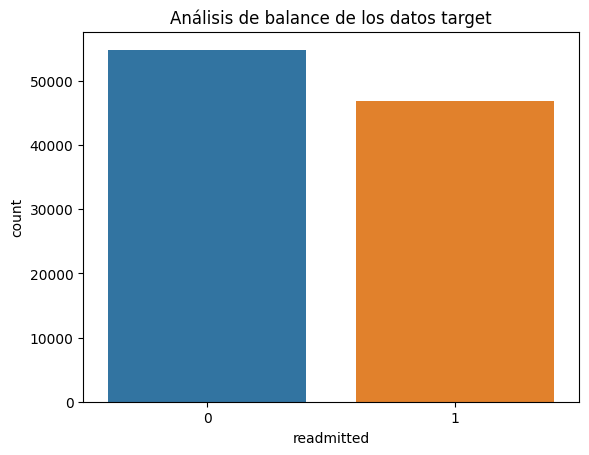

In [4]:
sns.countplot(x = "readmitted", data = db)
plt.title("Análisis de balance de los datos target") 

### Selección de datos con mayór relación

<AxesSubplot: >

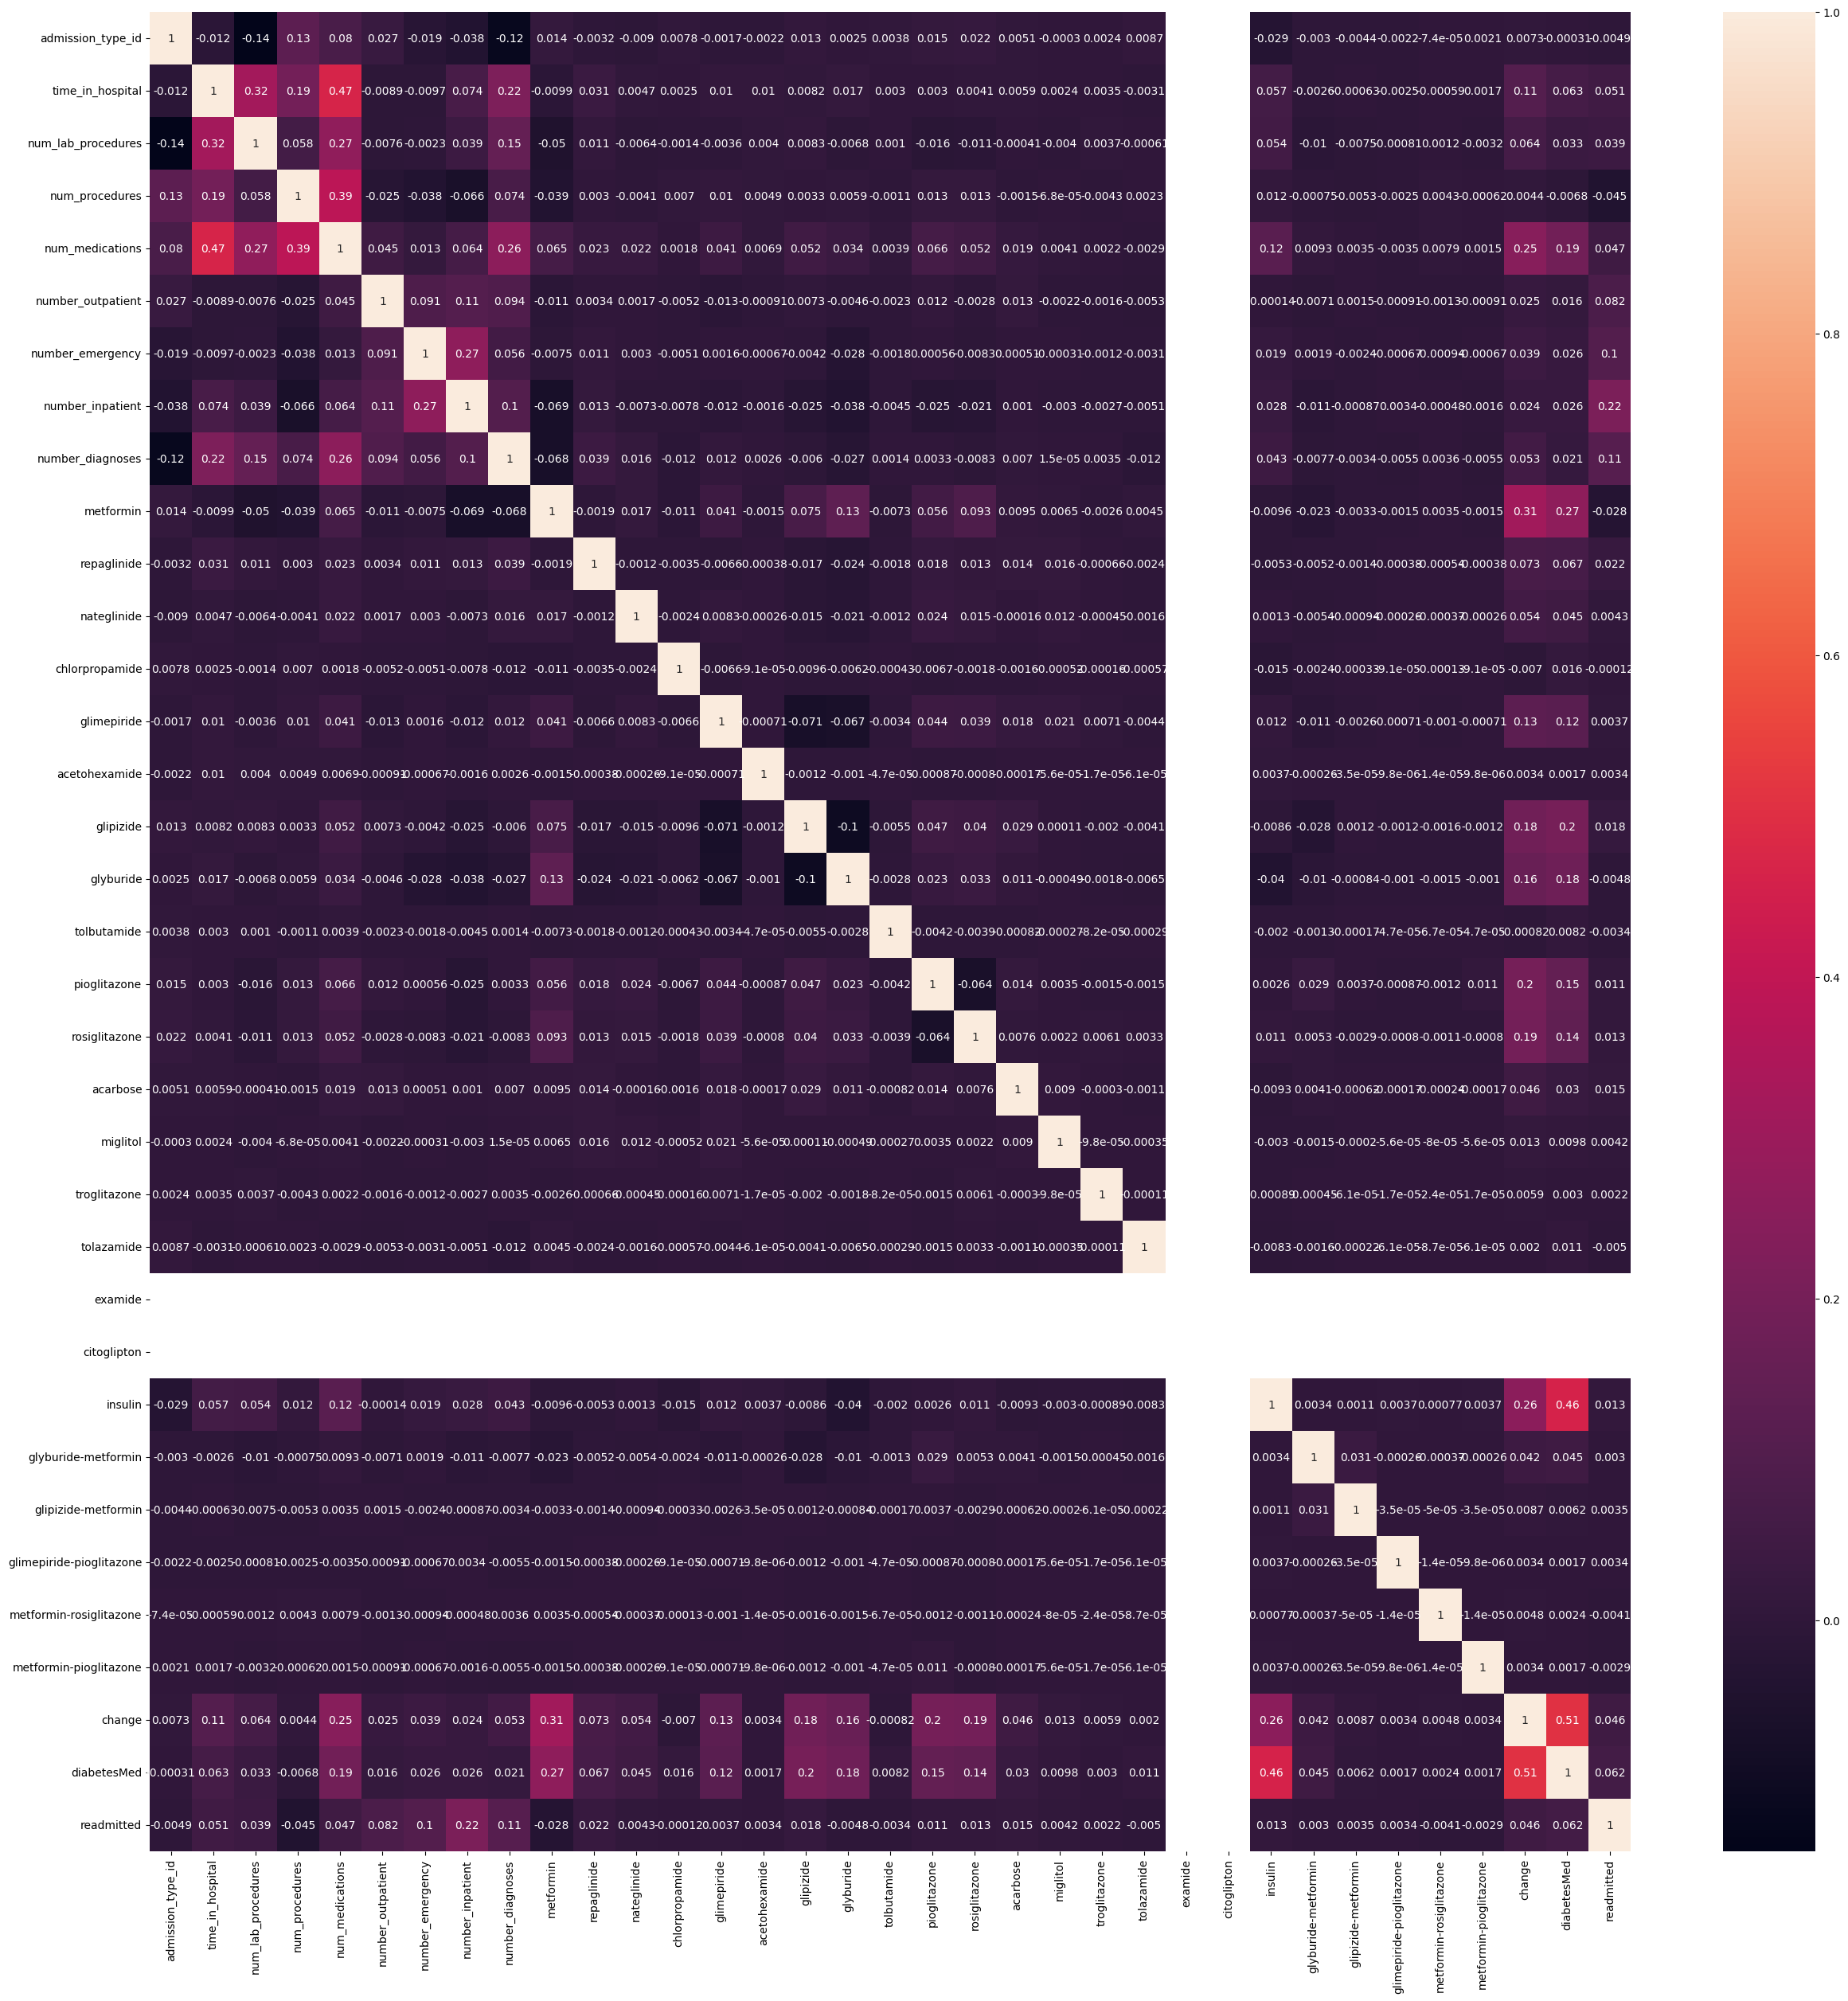

In [5]:
corr = db.corr() 
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot=True)

In [6]:
db = db.drop(columns=["examide", "citoglipton",'glyburide-metformin', 'glipizide-metformin',
                    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','acarbose', 
                    'miglitol', 'troglitazone', 'tolazamide', 'tolbutamide','acetohexamide','chlorpropamide',
                    'repaglinide', 'nateglinide'])


<AxesSubplot: >

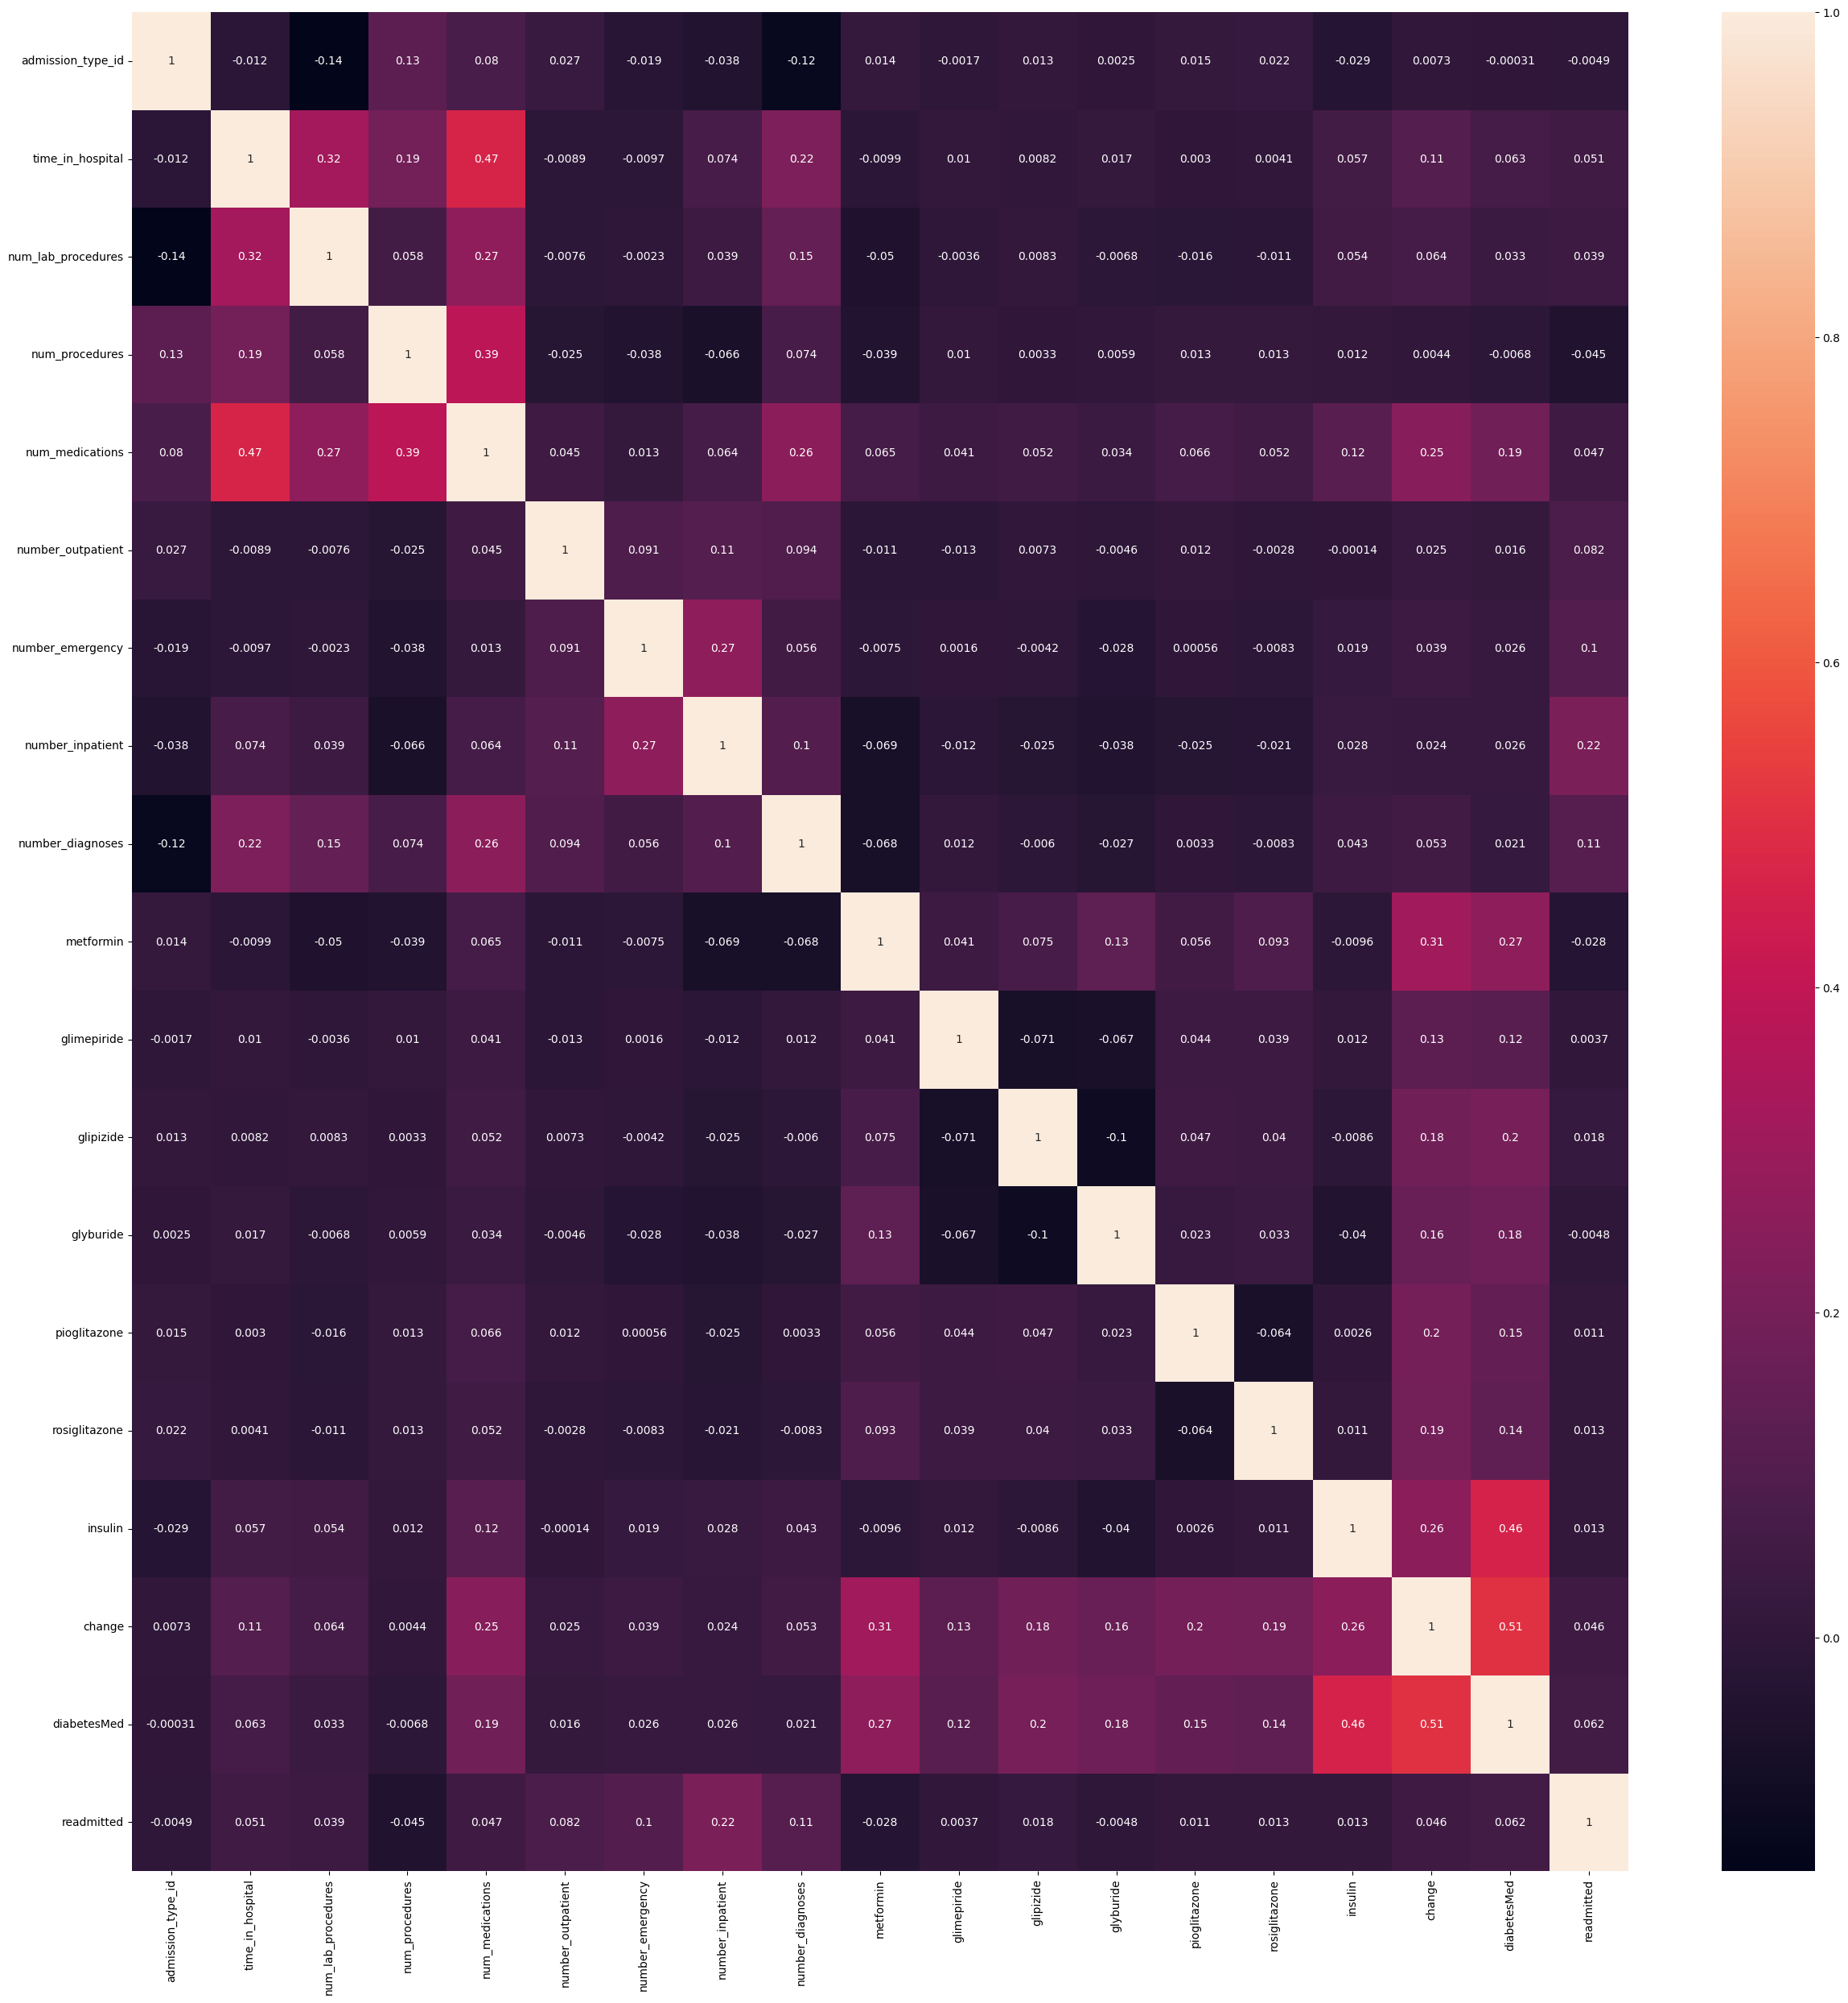

In [7]:
corr = db.corr() 
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot=True)

In [8]:
db_pca_selection = db.copy()
db_pca_selection = db_pca_selection.drop(columns=['race', 'gender', "age", 'weight', 'max_glu_serum', 'A1Cresult', "readmitted"])

In [9]:
#sns.pairplot(db[['time_in_hospital', 'num_lab_procedures', 'num_procedures',
#       'num_medications', 'number_outpatient', 'number_emergency',
#       'number_inpatient', 'number_diagnoses','readmitted']],hue='readmitted', palette='deep', corner=True)

In [10]:
db_pca_selection_dummies = pd.get_dummies(db_pca_selection)


In [11]:
X = scale(db_pca_selection_dummies, axis=0, with_mean=True, with_std=True, copy=True)

In [12]:
from sklearn.decomposition import PCA

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=db_pca_selection_dummies.columns, columns=['V'+ str(i) for i in range (1, (len(X[0])+1))])
pca_loadings

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
admission_type_id,0.002267,-0.050608,-0.283658,0.620456,-0.110291,-0.122313,-0.075785,-0.153873,0.047133,0.179975,-0.273330,-0.443905,-0.074056,0.341404,-0.195183,0.057243,-0.074572,0.010639
time_in_hospital,0.306868,0.407495,-0.096912,-0.071882,0.082324,0.045099,-0.006086,0.021657,0.117956,0.155838,-0.169230,-0.172137,-0.086544,-0.043434,0.667220,0.174473,-0.365221,-0.032376
num_lab_procedures,0.207901,0.337585,0.033126,-0.374001,0.062766,0.121274,-0.001649,0.047810,0.096532,0.236819,-0.471438,0.185896,0.042261,0.240854,-0.536755,0.074232,-0.072648,0.000725
num_procedures,0.169568,0.285641,-0.380691,0.316481,-0.085794,-0.108261,-0.033771,-0.083698,0.054253,-0.167009,0.303538,0.461319,0.143091,-0.240828,-0.247791,0.078901,-0.365307,-0.044834
num_medications,0.419405,0.341354,-0.162554,0.158597,0.018130,-0.001811,0.002061,0.003728,0.024635,0.023160,0.051677,0.029461,-0.052743,-0.076798,0.066969,-0.206848,0.768401,0.067660
number_outpatient,0.038039,0.049826,0.288452,0.339271,0.103388,0.100370,0.070689,0.001173,-0.760562,0.262701,-0.188244,0.271887,0.030563,-0.077154,0.077309,0.021696,-0.042571,0.005251
number_emergency,0.036915,0.044055,0.503434,0.325200,0.098970,-0.019168,-0.028128,0.031267,0.395726,-0.056389,0.130924,0.380098,-0.004720,0.527654,0.158276,0.024750,0.007987,0.001497
number_inpatient,0.056252,0.141533,0.540636,0.235303,0.097242,-0.034206,-0.055854,-0.026841,0.285548,-0.013601,-0.104236,-0.295966,0.068068,-0.605022,-0.235709,0.060683,-0.043717,0.051595
number_diagnoses,0.183843,0.330557,0.191991,-0.087345,0.053219,0.052455,0.062031,0.118262,-0.336988,-0.288293,0.481967,-0.433503,-0.098800,0.297696,-0.226579,0.090140,-0.119506,-0.002604
metformin,0.211021,-0.319650,-0.107080,0.037151,0.317216,0.173763,0.023569,0.198923,0.109071,0.401201,0.292153,0.064842,-0.521908,-0.104965,-0.142892,0.264760,-0.027762,0.179982


In [13]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC'+ str(i) for i in range (1, (len(X[0])+1))], 
index=db_pca_selection_dummies.index)
df_plot.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-3.704335,-1.382093,-1.415292,1.487051,-0.382890,-0.307042,-0.319028,-0.449274,1.079793,1.279621,-2.428702,-0.013093,-0.037533,0.516941,-0.270570,-0.374120,-0.342985,0.467135
1,0.878914,-0.134073,0.647546,-1.594591,-0.584408,-0.357919,-0.090917,-0.528444,-0.495002,-0.181286,0.090207,-0.155097,-0.310037,0.664332,-0.491740,-0.998481,0.224598,-0.065298
2,-0.726564,-0.381423,-0.288821,1.604798,-1.343664,1.842005,-0.249795,-0.097114,-0.715802,-0.147435,1.413272,1.386985,1.988449,-1.636320,0.234009,0.789938,-0.182813,-0.520358
3,0.423650,-0.786420,0.272997,-1.048517,-0.769644,-0.582765,-0.172088,-0.744458,-0.233809,-0.219458,0.173040,0.472422,-0.114208,0.065047,-0.233409,-1.109605,0.122703,-0.095246
4,0.135589,-2.055346,0.481108,-1.192175,-1.961193,1.611156,-0.479684,-0.575498,0.241639,0.431695,-0.333712,0.528975,1.382227,0.143817,-0.221340,-0.599511,-0.151456,0.642628


<AxesSubplot: >

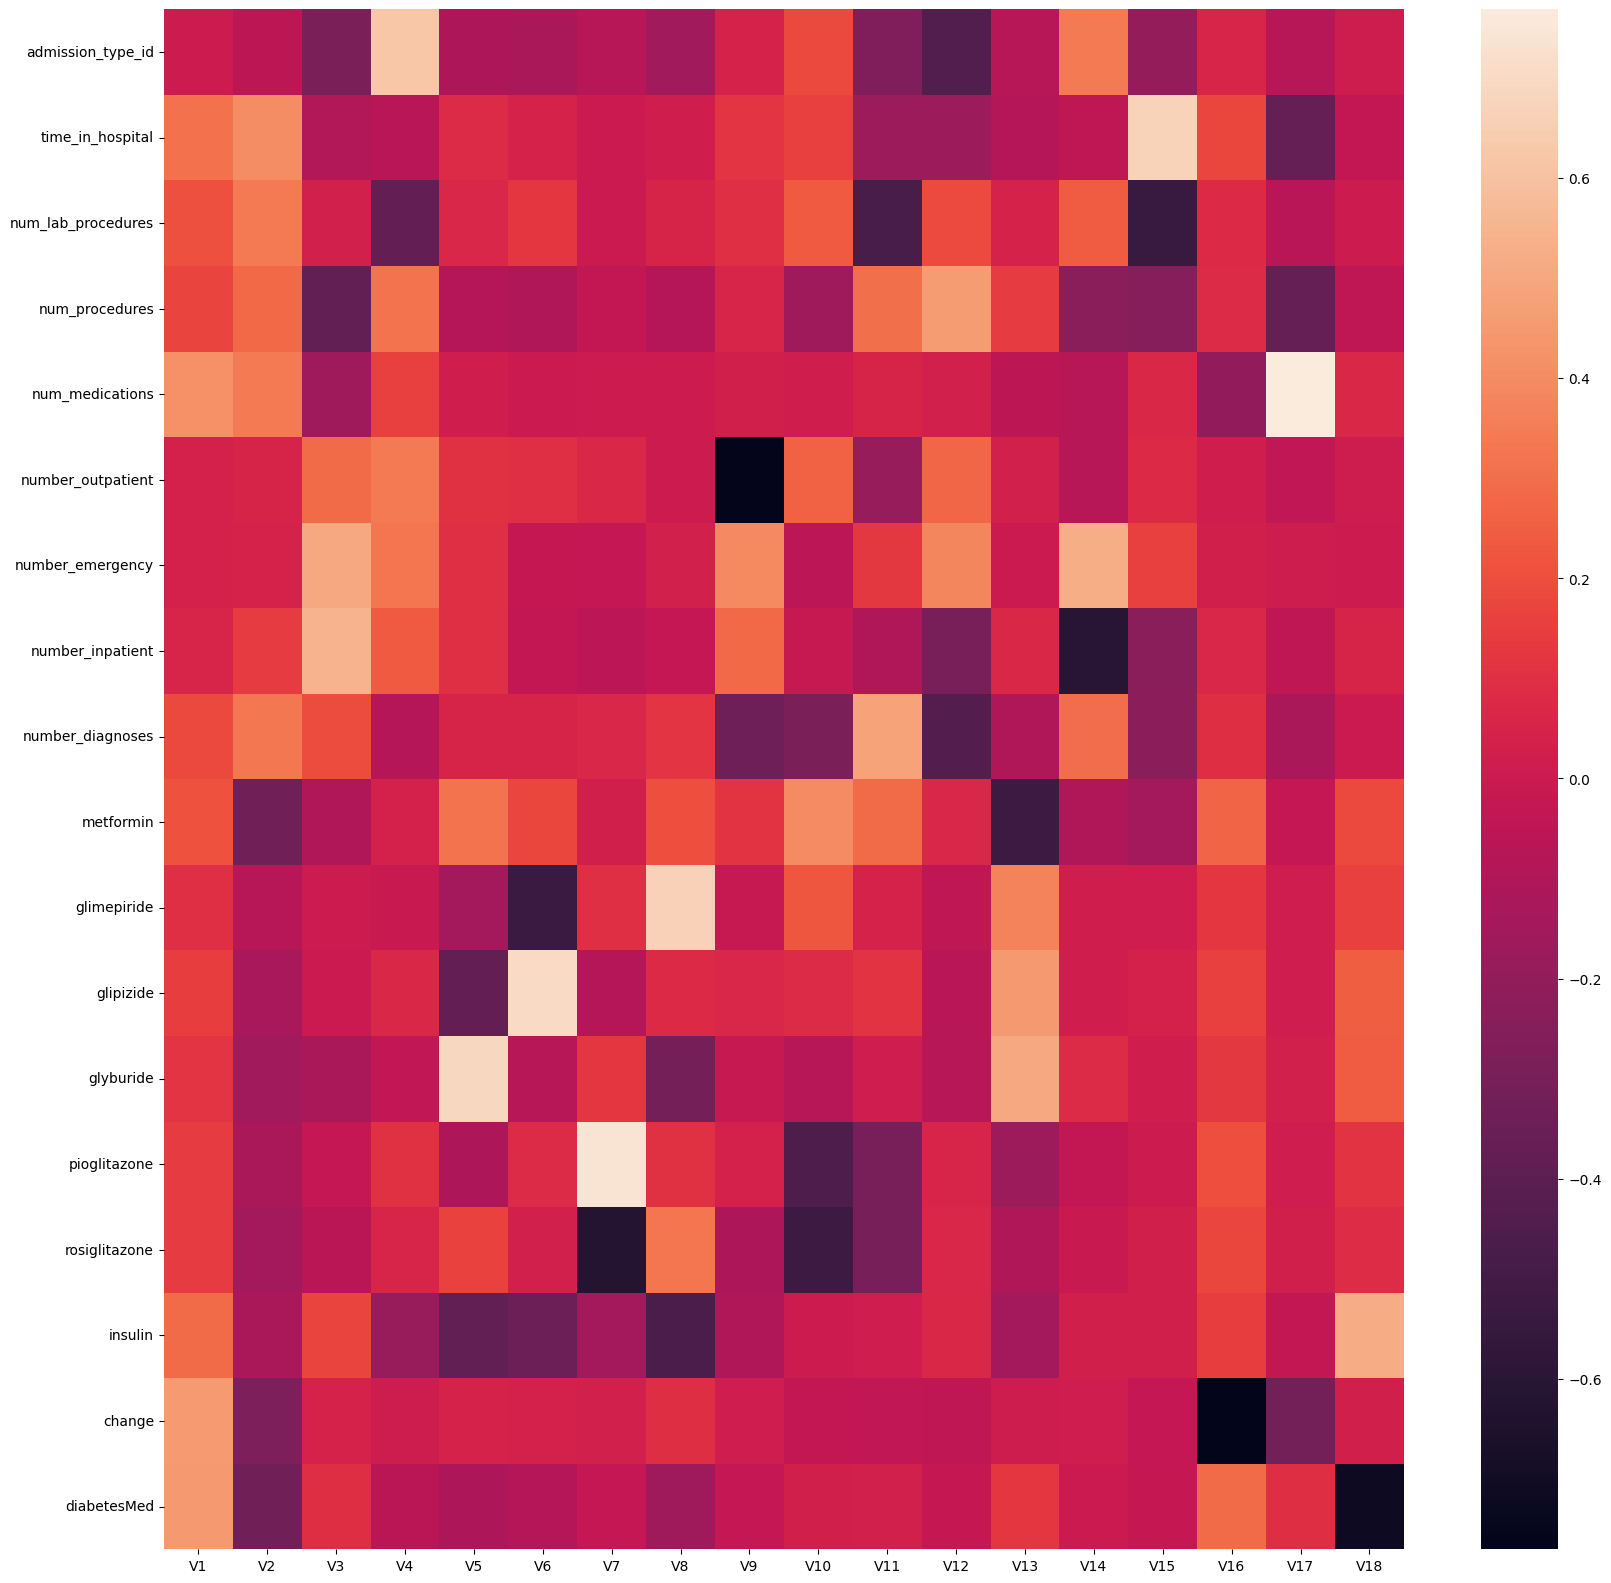

In [14]:
from matplotlib.pyplot import figure
figure(figsize=(20,20))
sns.heatmap(pca_loadings)

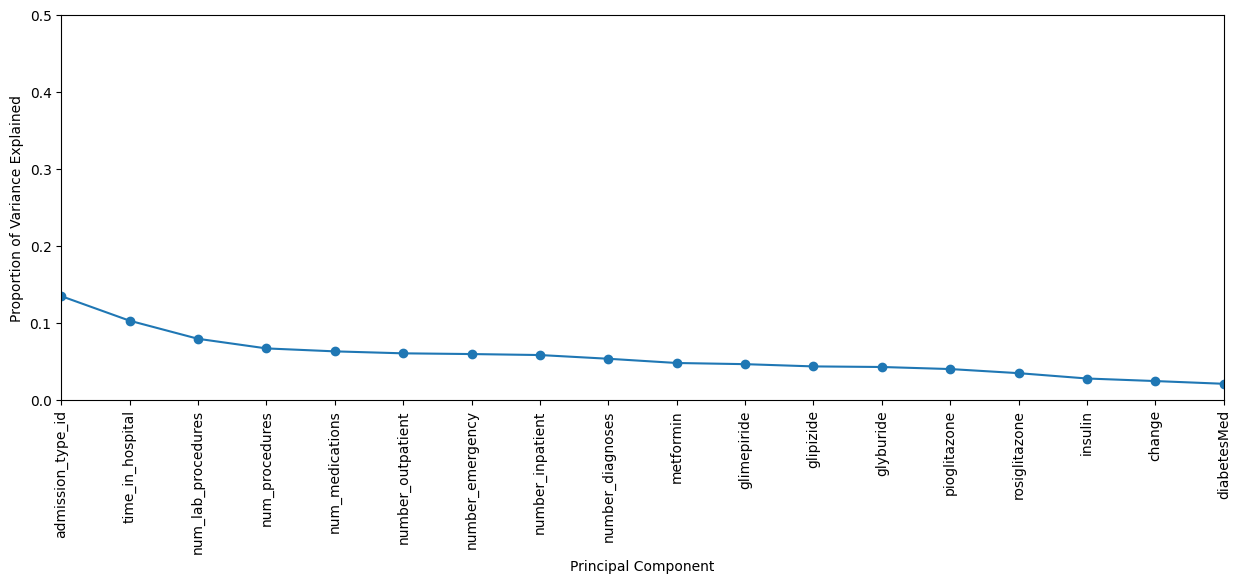

In [15]:
plt.figure(figsize=(15,5))
plt.plot(db_pca_selection_dummies.columns, pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks(rotation = 90)
plt.xlim(0.75,4.25)
plt.ylim(0,0.5)
plt.xticks(db_pca_selection_dummies.columns);

In [16]:
test = list(zip(db_pca_selection_dummies.columns, pca.explained_variance_ratio_))
test


[('admission_type_id', 0.13435687275141056),
 ('time_in_hospital', 0.10245512725914263),
 ('num_lab_procedures', 0.07894772716293762),
 ('num_procedures', 0.06647565055004569),
 ('num_medications', 0.06263702829162508),
 ('number_outpatient', 0.06008501359449192),
 ('number_emergency', 0.059144044424997544),
 ('number_inpatient', 0.05786788759295432),
 ('number_diagnoses', 0.05303796913651179),
 ('metformin', 0.047537460602612686),
 ('glimepiride', 0.04602389853612624),
 ('glipizide', 0.043103143391495326),
 ('glyburide', 0.04234183603318279),
 ('pioglitazone', 0.03966406667071406),
 ('rosiglitazone', 0.03433036564418329),
 ('insulin', 0.02739821094600057),
 ('change', 0.02407346135364903),
 ('diabetesMed', 0.020520236057918802)]

In [17]:
pca_drop_suggestion = ['insulin','change','diabetesMed']

In [18]:
db = db.drop(columns=pca_drop_suggestion)


In [19]:
db.to_csv('/work/diabetic_data_prepared.csv',index=False)

In [20]:
train, test = train_test_split(db, test_size=0.3, 
                               random_state=42,
                              stratify=db['readmitted'])

In [21]:
features = [list(db.columns[:-2])]
features

[['race',
  'gender',
  'age',
  'weight',
  'admission_type_id',
  'time_in_hospital',
  'num_lab_procedures',
  'num_procedures',
  'num_medications',
  'number_outpatient',
  'number_emergency',
  'number_inpatient',
  'number_diagnoses',
  'max_glu_serum',
  'A1Cresult',
  'metformin',
  'glimepiride',
  'glipizide',
  'glyburide',
  'pioglitazone']]

In [22]:
#Train
train = train.dropna()
X_train = train.drop( ['readmitted',], axis=1)
X_train = train[features[0]]
y_train = train['readmitted']
X_train = X_train.dropna()

In [24]:
#Test
test = test.dropna()
X_test = test.drop( ['readmitted',], axis=1)
X_test = test[features[0]]
y_test = test['readmitted']
X_test = X_test.dropna()

## 4.3.0 Evaluación de caracteristicas

In [25]:
X_train = pd.get_dummies(X_train)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
X_test = pd.get_dummies(X_test)

In [27]:
f_importances = model.feature_importances_
f_importances

array([0.04502036, 0.09701955, 0.18287941, 0.0473749 , 0.12248319,
       0.05549207, 0.01845564, 0.05691768, 0.05228409, 0.0124857 ,
       0.01303267, 0.01374405, 0.00820897, 0.01003967, 0.00270943,
       0.        , 0.00678398, 0.00261333, 0.0174428 , 0.01684458,
       0.        , 0.        , 0.00708458, 0.00544333, 0.00945964,
       0.01977345, 0.02213548, 0.01853797, 0.01418392, 0.00824496,
       0.        , 0.00602258, 0.0130908 , 0.00752475, 0.00710829,
       0.        , 0.00993747, 0.02248406, 0.01326072, 0.        ,
       0.01081883, 0.00863271, 0.00895996, 0.00546442])

In [28]:
columns_train = X_train.columns

In [29]:
list_features = list(zip(columns_train, f_importances))
list_features

[('admission_type_id', 0.04502036382065362),
 ('time_in_hospital', 0.0970195485690045),
 ('num_lab_procedures', 0.18287941010167527),
 ('num_procedures', 0.04737489949245485),
 ('num_medications', 0.12248319422505904),
 ('number_outpatient', 0.05549207200987701),
 ('number_emergency', 0.018455644181341747),
 ('number_inpatient', 0.056917675074494335),
 ('number_diagnoses', 0.05228408615763193),
 ('metformin', 0.01248570171543828),
 ('glimepiride', 0.013032668090936318),
 ('glipizide', 0.013744047075107414),
 ('glyburide', 0.008208973846103198),
 ('pioglitazone', 0.01003966744719252),
 ('race_AfricanAmerican', 0.0027094267549660606),
 ('race_Asian', 0.0),
 ('race_Caucasian', 0.006783982610437268),
 ('race_Other', 0.002613327782379393),
 ('gender_Female', 0.01744280242695555),
 ('gender_Male', 0.016844579597697452),
 ('age_[0-10)', 0.0),
 ('age_[10-20)', 0.0),
 ('age_[20-30)', 0.00708457504060262),
 ('age_[30-40)', 0.005443331804527087),
 ('age_[40-50)', 0.0094596398116892),
 ('age_[50-6

<AxesSubplot: >

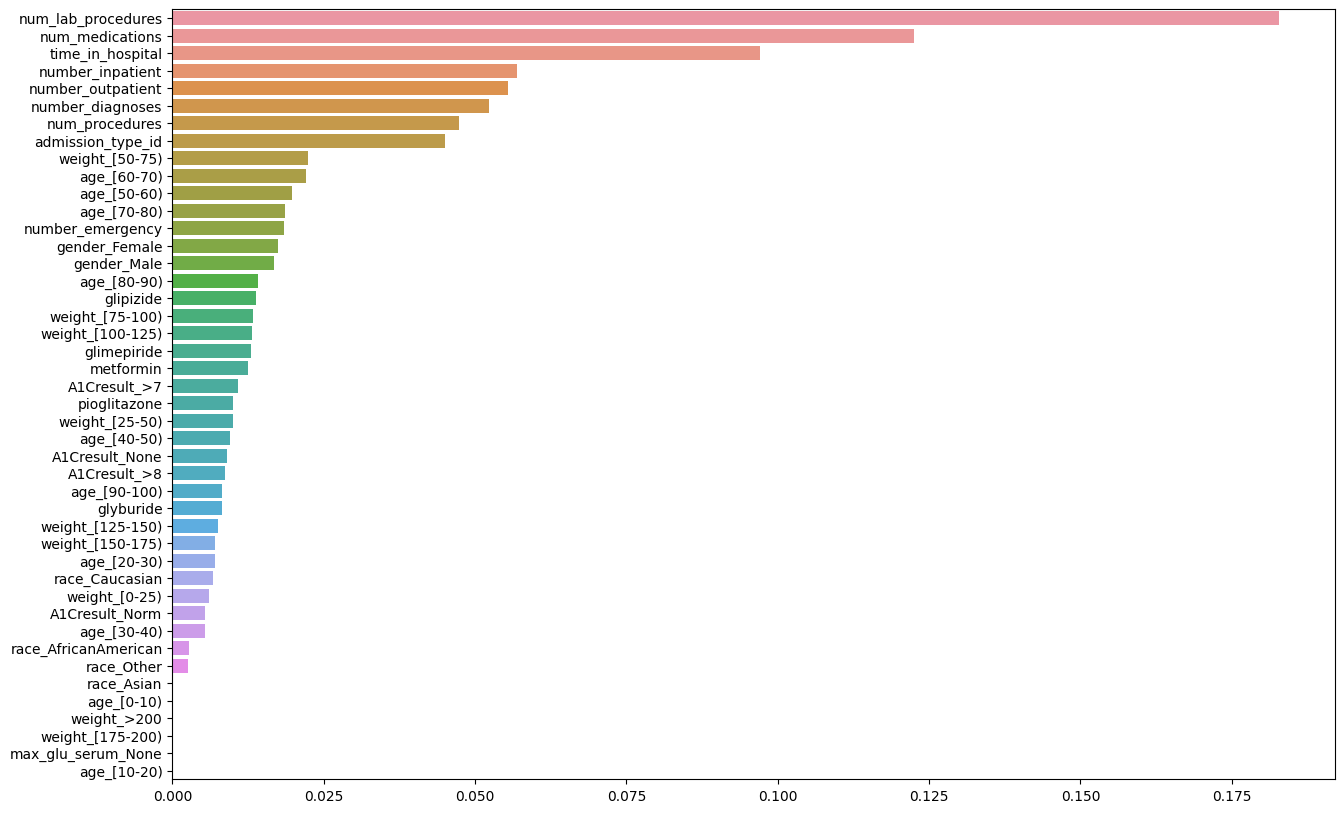

In [30]:
order_columns = X_train.columns[np.argsort(f_importances)[::-1]]
order_importance = np.sort(f_importances)[::-1]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=order_importance, y=order_columns)

### 5.1.0 Decision Tree Classifier

In [31]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

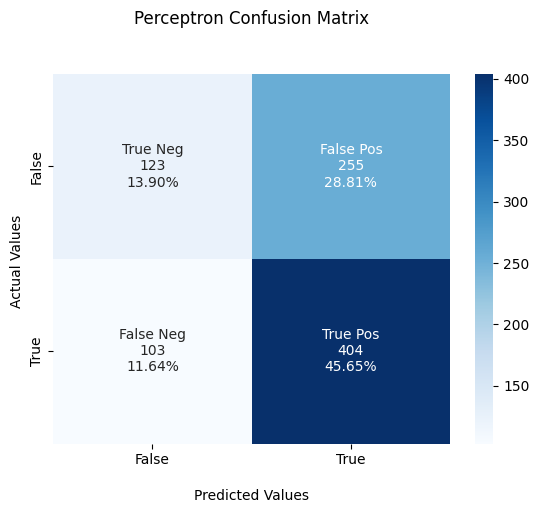

In [33]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Perceptron Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [34]:
decision_tree_class =  classification_report(y_test, y_pred)
print(decision_tree_class)

              precision    recall  f1-score   support

           0       0.54      0.33      0.41       378
           1       0.61      0.80      0.69       507

    accuracy                           0.60       885
   macro avg       0.58      0.56      0.55       885
weighted avg       0.58      0.60      0.57       885



In [35]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

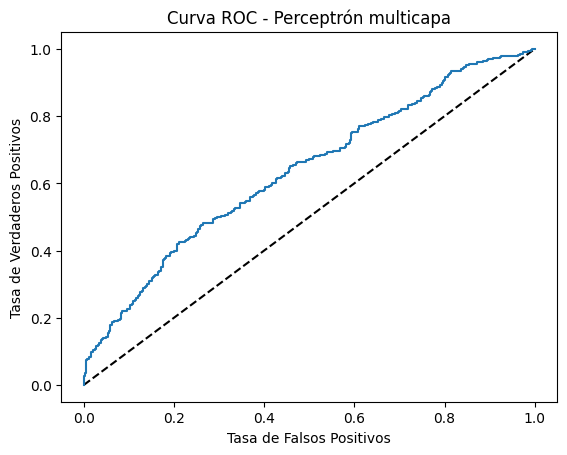

In [36]:
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='decision_tree_class')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Perceptrón multicapa')
plt.show()

In [37]:
# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))

accuracy:  0.5954802259887005
------------------------------
precision: 0.6130500758725341
------------------------------
recall:    0.796844181459566
------------------------------
f1:        0.692967409948542


In [38]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

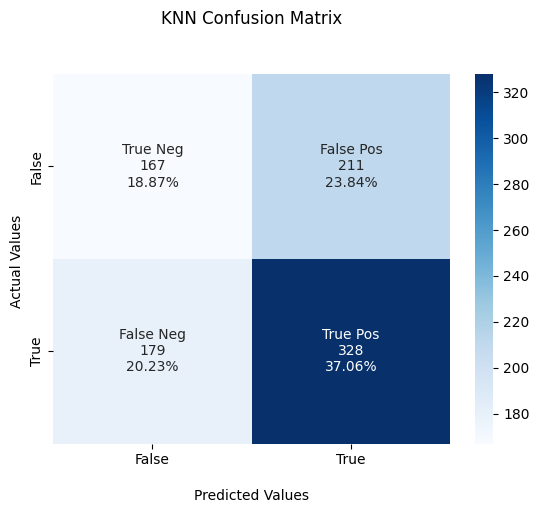

In [39]:
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('KNN Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [40]:
KNN = classification_report(y_test, y_pred)
print(KNN)

              precision    recall  f1-score   support

           0       0.48      0.44      0.46       378
           1       0.61      0.65      0.63       507

    accuracy                           0.56       885
   macro avg       0.55      0.54      0.54       885
weighted avg       0.55      0.56      0.56       885



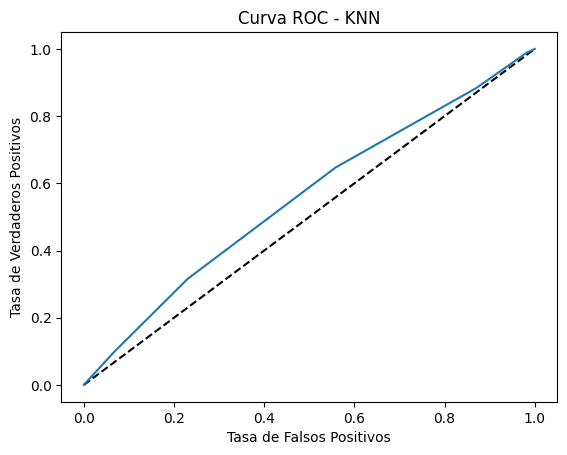

In [41]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - KNN')
plt.show()

In [42]:
# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))

accuracy:  0.559322033898305
------------------------------
precision: 0.608534322820037
------------------------------
recall:    0.6469428007889546
------------------------------
f1:        0.627151051625239


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
y_pred = model.predict(X_test)

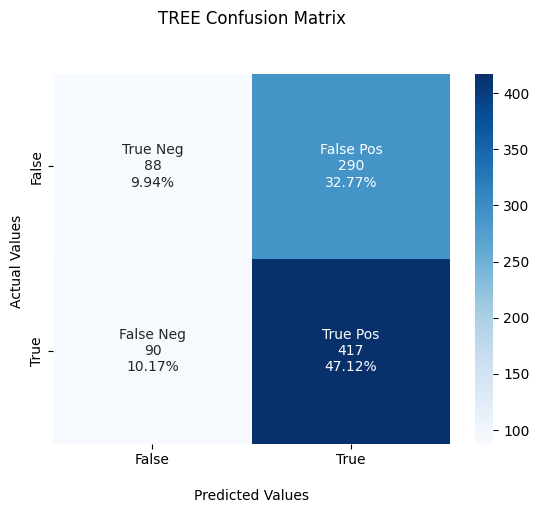

In [45]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('TREE Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [46]:
TREE = classification_report(y_test, y_pred)
print(TREE)

              precision    recall  f1-score   support

           0       0.49      0.23      0.32       378
           1       0.59      0.82      0.69       507

    accuracy                           0.57       885
   macro avg       0.54      0.53      0.50       885
weighted avg       0.55      0.57      0.53       885



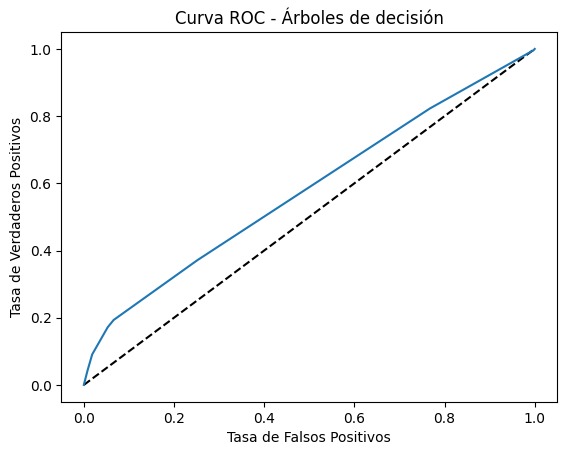

In [47]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='Árboles de decisión')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Árboles de decisión')
plt.show()

In [48]:
# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))

accuracy:  0.5706214689265536
------------------------------
precision: 0.5898161244695899
------------------------------
recall:    0.8224852071005917
------------------------------
f1:        0.6869851729818781


In [49]:
from sklearn.svm import SVC

model = SVC(probability=True)
model.fit(X_train, y_train)

SVC(probability=True)

In [50]:
y_pred = model.predict(X_test)

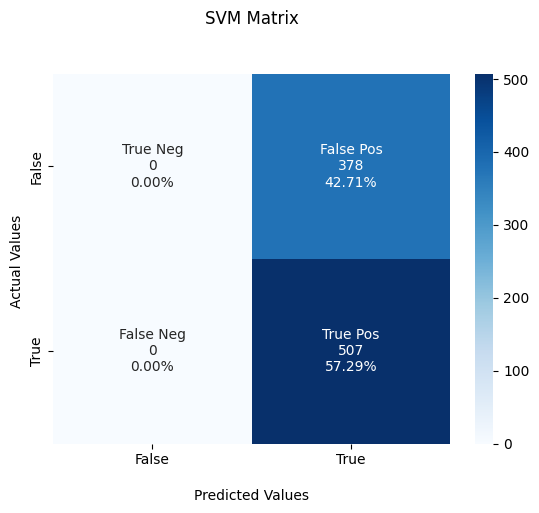

In [51]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('SVM Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [52]:
SVM = classification_report(y_test, y_pred)
print(SVM)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       378
           1       0.57      1.00      0.73       507

    accuracy                           0.57       885
   macro avg       0.29      0.50      0.36       885
weighted avg       0.33      0.57      0.42       885

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.

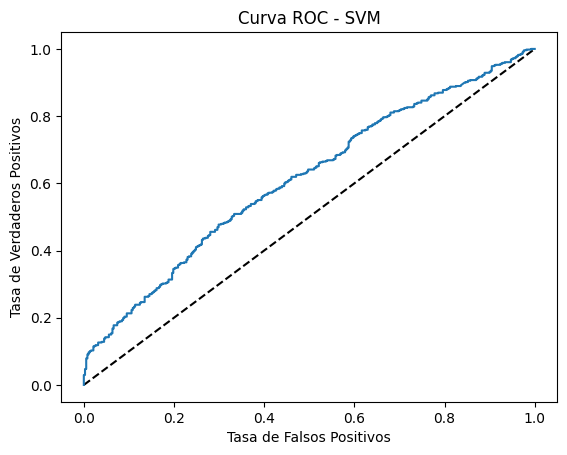

In [53]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='SVM')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - SVM')
plt.show()

In [54]:
# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))

accuracy:  0.5728813559322034
------------------------------
precision: 0.5728813559322034
------------------------------
recall:    1.0
------------------------------
f1:        0.7284482758620688


In [55]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   race                99493 non-null   object
 1   gender              101766 non-null  object
 2   age                 101766 non-null  object
 3   weight              3197 non-null    object
 4   admission_type_id   101766 non-null  int64 
 5   time_in_hospital    101766 non-null  int64 
 6   num_lab_procedures  101766 non-null  int64 
 7   num_procedures      101766 non-null  int64 
 8   num_medications     101766 non-null  int64 
 9   number_outpatient   101766 non-null  int64 
 10  number_emergency    101766 non-null  int64 
 11  number_inpatient    101766 non-null  int64 
 12  number_diagnoses    101766 non-null  int64 
 13  max_glu_serum       101766 non-null  object
 14  A1Cresult           101766 non-null  object
 15  metformin           101766 non-null  int64 
 16  gl

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49f0a3e6-eba7-4bd1-896c-a13c36012a92' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>